In [30]:
#coding=utf-8
%matplotlib inline
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号.

# load data and split feature and label
df = pd.read_csv('../data/hk_ipo_feature_engineered', sep='\t', index_col='code', encoding='utf-8')
Y = df['firstday_performance']
X = df.drop('firstday_performance', axis = 1)
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
eval_set = [(X_test, y_test)]


0.0643324471123


ImportError: You must install graphviz to plot tree

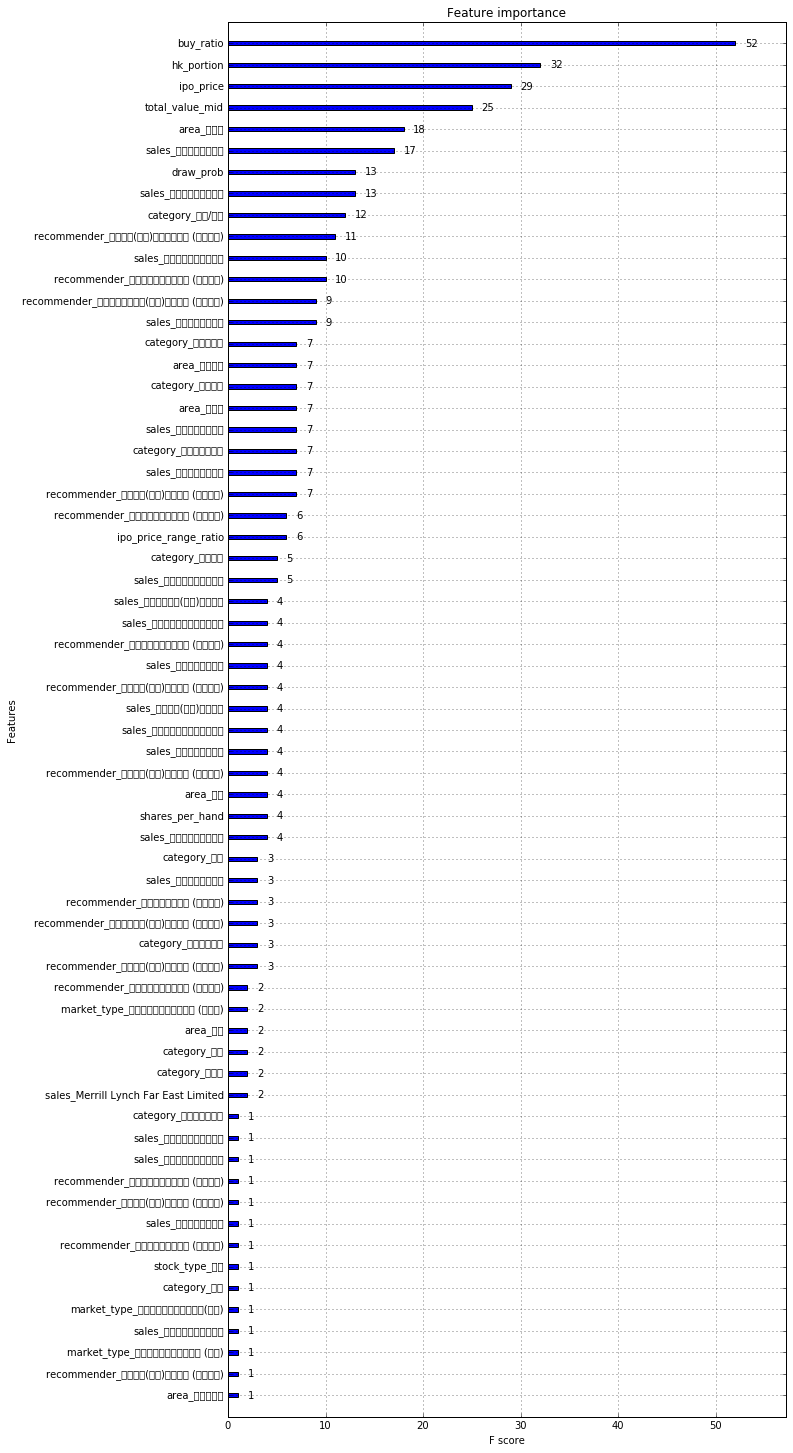

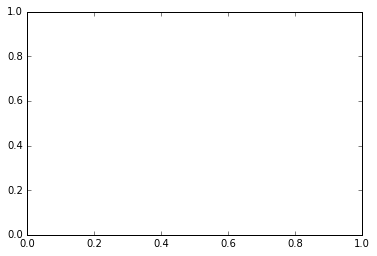

In [35]:
# fit model no training data
xgb_model = xgb.XGBRegressor().fit(X_train,y_train)
predictions = xgb_model.predict(X_test)
actuals = y_test
print mean_squared_error(actuals, predictions)

fig, ax = plt.subplots(1,1,figsize=(10, 25))
xgb.plot_importance(xgb_model, ax = ax)
xgb.plot_tree(xgb_model, num_trees=2)

In [ ]:
!pip install graphviz